In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import base64
from io import BytesIO
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import scipy.stats as stats
from scipy.stats import skew, kurtosis

## Load the Data

In [3]:
url='https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv'
df=pd.read_csv(url)
df.head(5)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [9]:
len(df)

34857

In [7]:
df.Price.isnull().sum()

7610

#### 1- Cast the price column in the Melbourne housing market dataset to an integer type and remove any null values in the price column and check how much data is lost after removing the null values. 

In [23]:
# Cast the Price column to integer and drop rows with null values in the Price column
df['Price'] = df['Price'].dropna().astype(int)
df_cleaned = df.dropna(subset=['Price'])

# Calculate the percentage of data loss
initial_count = len(df)
cleaned_count = len(df_cleaned)
data_loss_percentage = (initial_count - cleaned_count) / initial_count * 100

print(f'Dear Santiago, Dropping all null values lead to a loss of {data_loss_percentage} % of the data.' "\U0001F609")

Dear Santiago, Dropping all null values lead to a loss of 21.83205668875692 % of the data.😉


#### 2- What is the most common type of property, and what percentage of the properties does it represent? (h-house; u-unit; t-townhouse;)
To determine the most common property type, you should use the entire dataset (df), not just the cleaned dataset (df_cleaned) which only excludes rows with null Price values. This ensures that the analysis considers all available data for property types.

In [26]:
df_cleaned.Type.unique()

array(['h', 't', 'u'], dtype=object)

In [32]:
df.Type.value_counts()

Type
h    23980
u     7297
t     3580
Name: count, dtype: int64

In [47]:
# Find the most common type of property in the full dataset
most_common_type = df['Type'][0]
type_count = df['Type'].value_counts()
most_common_type_percentage = (type_count[most_common_type] / len(df)) * 100

print(f'Dear Santiago, the most common Type is {most_common_type}-House, \n\nand they represent {most_common_type_percentage} % of the total properties "\U0001F609"')


Dear Santiago, the most common Type is h-House, 

and they represent 68.79536391542588 % of the total properties "😉"


### 3-Create a graph to show the **frequencey of each property type** in descending order, which **graph technique** is the most suitable and straightforward approach for this task?

Dear Santiago,The most suitable and straightforward approach to show 

the frequency of each property type in descending

 order is a Barplot."😉"


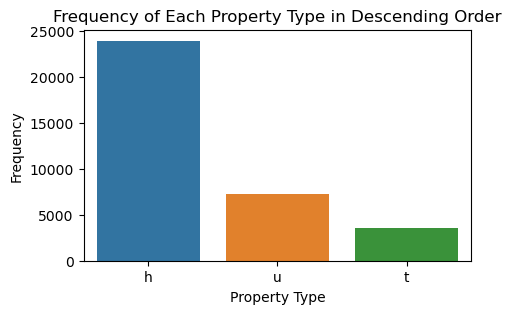

In [46]:
print('Dear Santiago,The most suitable and straightforward approach to show \n\nthe frequency of each property type in descending\n\n order is a Barplot."\U0001F609"')

# Count the frequency of each property type
property_type_counts = df['Type'].value_counts()

# Create the barplot
plt.figure(figsize=(5, 3))
sns.barplot(x=property_type_counts.index, y=property_type_counts.values, order=property_type_counts.index)
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.title('Frequency of Each Property Type in Descending Order')
plt.show()

### 4- How does the number of rooms impact the median property price? represent this relationship using a bar chart. 



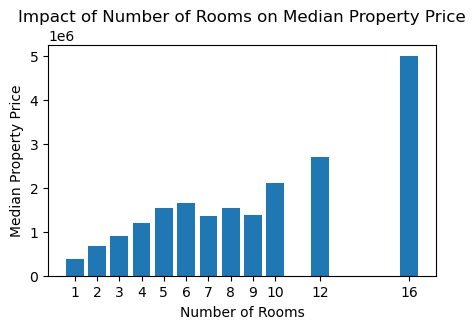

Dear Santiago, the median poperty price by room,

as we can see from the bar chart is increasing until there are 6 rooms,

 and then it decrease when the house has 7 to 0 rooms compared to when the house has 6 or 5 rooms,

 to understand the relationship we need to do a Spearman test.😉  

     Rooms      Price
0       1   390000.0
1       2   678000.0
2       3   900000.0
3       4  1205250.0
4       5  1550000.0
5       6  1660000.0
6       7  1350000.0
7       8  1535883.0
8       9  1380000.0
9      10  2115000.0
10     12  2705000.0
11     16  5000000.0 


In [63]:
# Calculate the median price for each number of rooms
median_price_by_rooms = df_cleaned.groupby('Rooms')['Price'].median().reset_index()


# Create the bar chart
plt.figure(figsize=(5, 3))
plt.bar(median_price_by_rooms['Rooms'], median_price_by_rooms['Price'])
plt.xlabel('Number of Rooms')
plt.ylabel('Median Property Price')
plt.title('Impact of Number of Rooms on Median Property Price')
plt.xticks(median_price_by_rooms['Rooms'])
plt.show()
print(f'Dear Santiago, the median poperty price by room,\n\nas we can see from the bar chart is increasing until there are 6 rooms,\n\n and then it decrease when the house has 7 to 0 rooms compared to when the house has 6 or 5 rooms,\n\n to understand the relationship we need to do a Spearman test.\U0001F609  \n\n {median_price_by_rooms} ')

### 5- Perfom a spearman correlation coefficient to analyze the relationship betwee price and number of rooms. 

In [61]:


# we need first to make sure to Drop rows with missing values in 'Rooms' or 'Price' columns
df_spearman = df.dropna(subset=['Rooms', 'Price'])

# Recalculate the Spearman correlation coefficient and p-value
spearman_corr, spearman_p_value = spearmanr(df_spearman['Rooms'], df_spearman['Price'])

print(f'Dear Reader, The Spearman correlaation coefficient is{spearman_corr},\n\n and the Spearman p-Value is {spearman_p_value}\n\n \U0001F609')

Dear Reader, The Spearman correlaation coefficient is0.5042971590926004,

 and the Spearman p-Value is 0.0

 😉


Spearman Correlation Coefficient:

The value 
0.504
0.504 indicates a moderate positive monotonic relationship between the number of rooms and the property price.
This suggests that as the number of rooms increases, the property price tends to increase as well, and this relationship holds in a monotonic fashion (though not necessarily linear).

### 6- is there a relationship between the distance from the central business distric (CBD) and the property price?

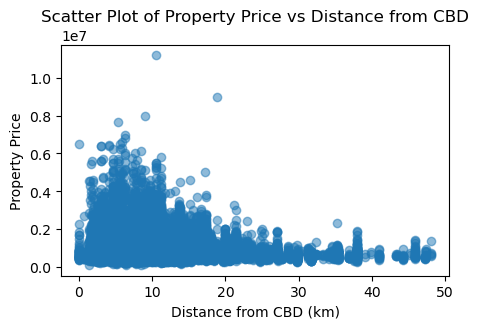

(-0.21138434279158302, 8.435456226003091e-273)

In [67]:
# Clean the Price column and cast to integer
df['Price'] = df['Price'].dropna().astype(int)
df_cleaned = df.dropna(subset=['Price', 'Distance'])

# Create the scatter plot
plt.figure(figsize=(5, 3))
plt.scatter(df_cleaned['Distance'], df_cleaned['Price'], alpha=0.5)
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Property Price')
plt.title('Scatter Plot of Property Price vs Distance from CBD')
plt.show()

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(df_cleaned['Distance'], df_cleaned['Price'])

correlation, p_value

**The scatter plot: **  There appears to be a general trend where property prices decrease as the distance from the CBD increases. This is visually indicated by the downward spread of the points as the distance increases.

**correlation coefficient: **
* The Pearson correlation coefficient is 0.211This value indicates a weak negative linear relationship between the distance from the CBD and the property price.
As the distance from the CBD increases, the property price tends to decrease, but the relationship is not very strong.

* The p-value is 8.435456226003091e-273,  This extremely low p-value indicates that the observed correlation is statistically significant. Therefore, the relationship between the distance from the CBD and property prices is highly unlikely to have occurred by chance.

### 7- Is there a relationship between the property size and the property price? 

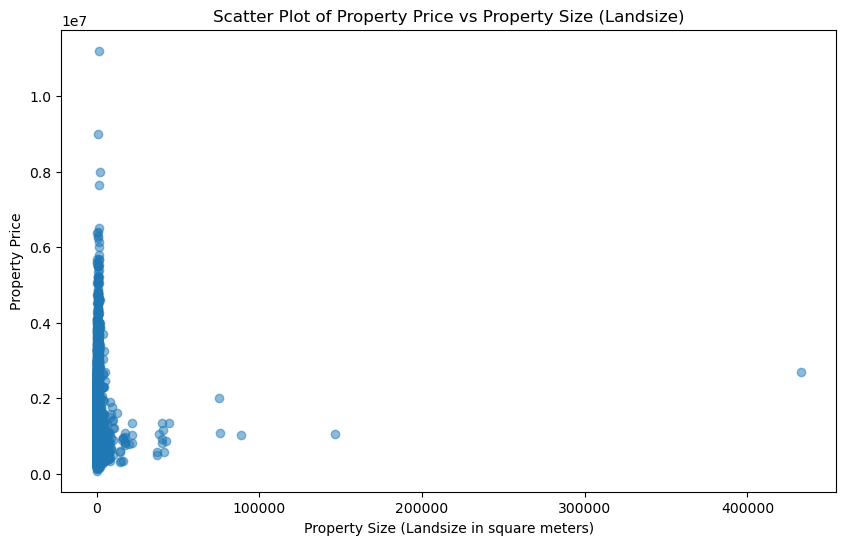

In [68]:
# Clean the Price column and cast to integer
df['Price'] = df['Price'].dropna().astype(int)
df_cleaned = df.dropna(subset=['Price', 'Landsize'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Landsize'], df_cleaned['Price'], alpha=0.5)
plt.xlabel('Property Size (Landsize in square meters)')
plt.ylabel('Property Price')
plt.title('Scatter Plot of Property Price vs Property Size (Landsize)')
plt.show()

print('There is no relationship ')

### 8- Use quantile-based discretization function to categorize  the landsize variable and create a barplot. when using q=7, how does the relationship between land size and the median property price change compared to using a lower guantile. 

/var/folders/dc/ldz3k5913l3gjmcgcw60g3x80000gp/T/ipykernel_21426/827820799.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Landsize_q7'] = pd.qcut(df_cleaned['Landsize'], q=7, labels=False)


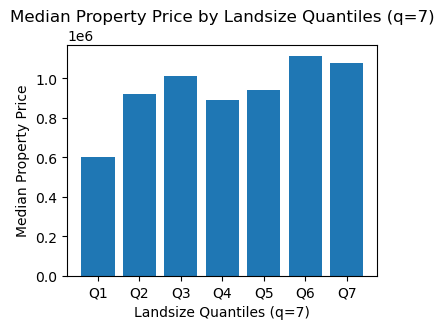

/var/folders/dc/ldz3k5913l3gjmcgcw60g3x80000gp/T/ipykernel_21426/827820799.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Landsize_q4'] = pd.qcut(df_cleaned['Landsize'], q=4, labels=False)


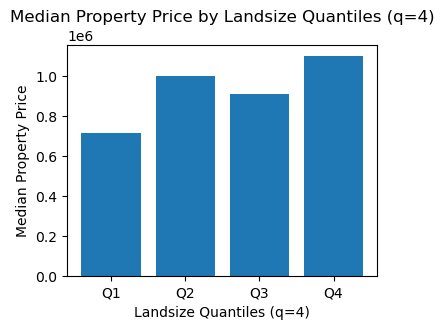

In [70]:
# Clean the Price column and cast to integer
df['Price'] = df['Price'].dropna().astype(int)
df_cleaned = df.dropna(subset=['Price', 'Landsize'])

# Quantile-based discretization for q=7
df_cleaned['Landsize_q7'] = pd.qcut(df_cleaned['Landsize'], q=7, labels=False)

# Calculate median property price for each quantile category (q=7)
median_price_q7 = df_cleaned.groupby('Landsize_q7')['Price'].median().reset_index()

# Create bar plot for q=7
plt.figure(figsize=(4, 3))
plt.bar(median_price_q7['Landsize_q7'], median_price_q7['Price'], tick_label=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7'])
plt.xlabel('Landsize Quantiles (q=7)')
plt.ylabel('Median Property Price')
plt.title('Median Property Price by Landsize Quantiles (q=7)')
plt.show()

# Quantile-based discretization for q=4
df_cleaned['Landsize_q4'] = pd.qcut(df_cleaned['Landsize'], q=4, labels=False)

# Calculate median property price for each quantile category (q=4)
median_price_q4 = df_cleaned.groupby('Landsize_q4')['Price'].median().reset_index()

# Create bar plot for q=4
plt.figure(figsize=(4, 3))
plt.bar(median_price_q4['Landsize_q4'], median_price_q4['Price'], tick_label=['Q1', 'Q2', 'Q3', 'Q4'])
plt.xlabel('Landsize Quantiles (q=4)')
plt.ylabel('Median Property Price')
plt.title('Median Property Price by Landsize Quantiles (q=4)')
plt.show()


**Price Variation:**
* In the q=7 plot, you can see more precise variations in property prices within smaller land size ranges.
* The q=4 plot shows a more aggregated view, which might smooth out some of the smaller variations visible in the q=7 plot.


### Question9 
does the dataset contain any properties that are prices significantly above or below the average? to investigate, create a box plot to detect potential outliers, and use Tukey's methode with a 1.5 threshold to create a new dataframe without these outliers. what percentage of properties are identified as outliers using tukey's methode? 

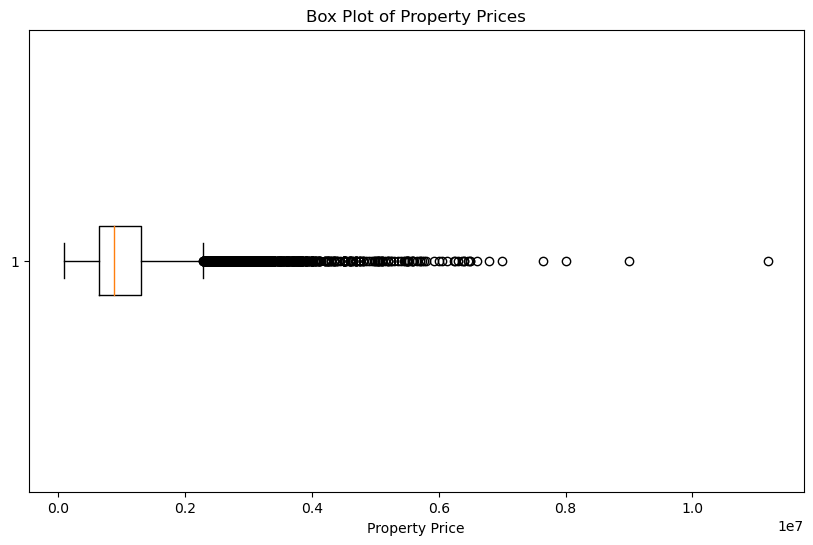

In [72]:
# Clean the Price column and cast to integer
df['Price'] = df['Price'].dropna().astype(int)
df_cleaned = df.dropna(subset=['Price'])

# Create a box plot to detect potential outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df_cleaned['Price'], vert=False)
plt.xlabel('Property Price')
plt.title('Box Plot of Property Prices')
plt.show()




In [73]:
# Identify outliers using Tukey's method with a 1.5 threshold
Q1 = df_cleaned['Price'].quantile(0.25)
Q3 = df_cleaned['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new dataframe without outliers
df_no_outliers = df_cleaned[(df_cleaned['Price'] >= lower_bound) & (df_cleaned['Price'] <= upper_bound)]

# Calculate the percentage of properties identified as outliers
num_outliers = df_cleaned.shape[0] - df_no_outliers.shape[0]
percentage_outliers = (num_outliers / df_cleaned.shape[0]) * 100

num_outliers, percentage_outliers

(1278, 4.690424633904651)

###  Question 10-
 How is the property price distribution? create a QQ plot to compare the distribution of the property prices to a normal distribution visually and calculate the skew and kurtosis and to get a better understanding of the shape of the distribution analytically? 

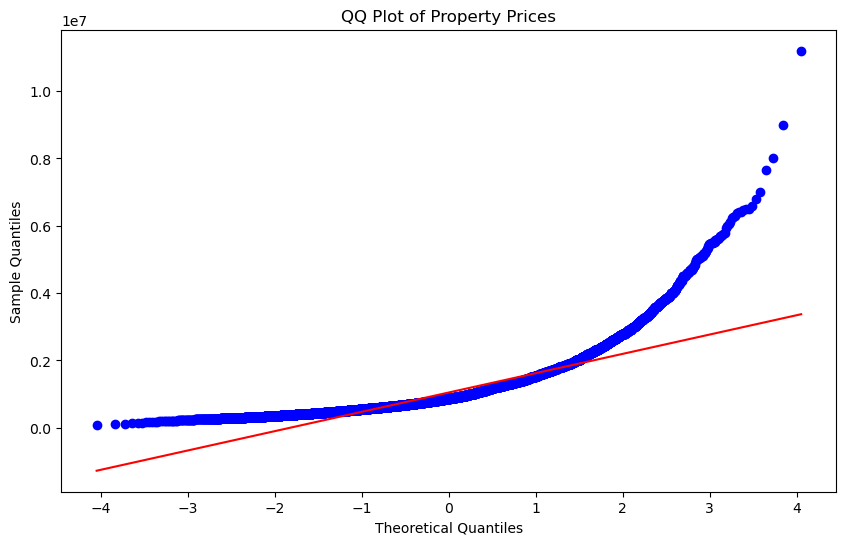

(2.588826811108291, 13.094577018742875)

In [76]:
# Clean the Price column and cast to integer
df['Price'] = df['Price'].dropna().astype(int)
df_cleaned = df.dropna(subset=['Price'])

# Create a QQ plot to compare the distribution of property prices to a normal distribution
plt.figure(figsize=(10, 6))
stats.probplot(df_cleaned['Price'], dist="norm", plot=plt)
plt.title('QQ Plot of Property Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Calculate skewness and kurtosis
price_skewness = skew(df_cleaned['Price'])
price_kurtosis = kurtosis(df_cleaned['Price'])

price_skewness, price_kurtosis


**Analysis**
* The property price distribution is right-skewed, indicating that there are more properties with prices lower than the mean and a long tail of properties with higher prices.
* The high kurtosis value suggests that the distribution has heavy tails and a sharper peak, implying the presence of outliers and extreme values.
* The QQ plot visually confirms these findings, showing significant deviations from normality, particularly in the tails of the distribution.

## Question 11
Performing a Normality Test: Kolmogorov-Smirnov Test of the property priceses, what possible conclusion can be drawn from the test results reggarding the similarity of the distribution to a normal distribution? 


In [77]:
# H0= The distribution of property prices is normal 
#H1 = the distribution of property prices significantly differs from a normal distribution

# Clean the Price column and cast to integer
df['Price'] = df['Price'].dropna().astype(int)
df_cleaned = df.dropna(subset=['Price'])

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = stats.kstest(df_cleaned['Price'], 'norm', args=(df_cleaned['Price'].mean(), df_cleaned['Price'].std()))

ks_statistic, p_value

(0.13751284953784154, 0.0)

**conclusion**
*P-value < 0.05:
*Since the p-value is 0.0, which is less than the significance level of 0.05, we reject the null hypothesis.
This means that the distribution of property prices significantly differs from a normal distribution.

### Quetion 12
How do property Prices differ between different property types? create a box plot to show the distribution of property prices for eah property type.


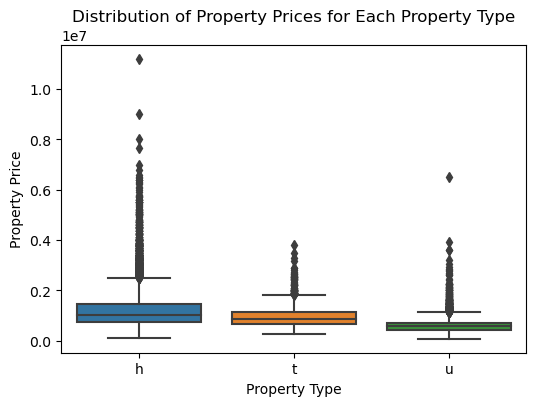

In [79]:
# Clean the Price column and cast to integer, and drop rows with null values in 'Price' or 'Type'
df['Price'] = df['Price'].dropna().astype(int)
df_cleaned = df.dropna(subset=['Price', 'Type'])

# Create a box plot to show the distribution of property prices for each property type
plt.figure(figsize=(6, 4))
sns.boxplot(x='Type', y='Price', data=df_cleaned)
plt.xlabel('Property Type')
plt.ylabel('Property Price')
plt.title('Distribution of Property Prices for Each Property Type')
plt.show()


**Conclusion**

* The box plot clearly shows that property prices vary significantly between different property types. 
* Houses generally have higher prices compared to townhouses and units. 
* Units tend to have the lowest property prices with a more compact distribution, while houses exhibit the widest range of prices with many high-value outliers. 






## Question 13 
what is the region with the highest median price? and which is the region with the lowest medan pric? 

In [83]:
# Clean the Price column and cast to integer, and drop rows with null values in 'Price' or 'Regionname'
df['Price'] = df['Price'].dropna().astype(int)
df_cleaned = df.dropna(subset=['Price', 'Regionname'])

# Group by region and calculate the median price for each region
median_prices_by_region = df_cleaned.groupby('Regionname')['Price'].median().reset_index()

# Identify the region with the highest median price
region_highest_median_price = median_prices_by_region.loc[median_prices_by_region['Price'].idxmax()]

# Identify the region with the lowest median price
region_lowest_median_price = median_prices_by_region.loc[median_prices_by_region['Price'].idxmin()]

print(f'The reigion with the highest median price is{region_highest_median_price}')
print(f'The region with the lowest median price is{ region_lowest_median_price}')


The reigion with the highest median price isRegionname    Southern Metropolitan
Price                     1250000.0
Name: 5, dtype: object
The region with the lowest median price isRegionname    Western Victoria
Price                 412125.0
Name: 7, dtype: object


### Question 14
Is there a statistically significant association between reagion and the price property?? use chi sqare to test to assess the independence between region and price and cramer's v coeefficient to quantify the strength of the association between these two features. 
the variableis need to be catigorical, so divide the price variable into five distict ranges. 
use chohen 1988 interpretation on cramers v, which depends on the degree of freedom. 

In [84]:
# Clean the Price column and cast to integer, and drop rows with null values in 'Price' or 'Regionname'
df['Price'] = df['Price'].dropna().astype(int)
df_cleaned = df.dropna(subset=['Price', 'Regionname'])

# Categorize the Price variable into five distinct ranges using KBinsDiscretizer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df_cleaned['Price_Category'] = est.fit_transform(df_cleaned[['Price']]).astype(int)

# Create a contingency table
contingency_table = pd.crosstab(df_cleaned['Regionname'], df_cleaned['Price_Category'])

# Perform the Chi-Square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

# Calculate Cramer's V
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))

chi2_stat, p_val, dof, cramers_v


NameError: name 'KBinsDiscretizer' is not defined

### question 15 

In [86]:


# Convert the Date column to datetime format and extract the year
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year

# Calculate median prices for the earliest and latest year
median_price_by_year = df.groupby('Year')['Price'].median()

# Get the earliest and latest year
earliest_year = median_price_by_year.idxmin()
latest_year = median_price_by_year.idxmax()

# Calculate the percentage change in median price
earliest_median_price = median_price_by_year[earliest_year]
latest_median_price = median_price_by_year[latest_year]
percentage_change = ((latest_median_price - earliest_median_price) / earliest_median_price) * 100

earliest_year, latest_year, earliest_median_price, latest_median_price, percentage_change


(2018, 2016, 836500.0, 885000.0, 5.797967722653915)

there is no significant different between early and latest. 

### Question 16 


In [92]:
import pandas as pd

# Extract the Month from the Date column
df['Month'] = df['Date'].dt.month

# Count the number of sales per month
sales_by_month = df['Month'].value_counts().sort_index()

# Identify the month with the most sales
most_sales_month = sales_by_month.idxmax()
most_sales_count = sales_by_month.max()


print(f'most sale month is novermber:  {most_sales_month}')
most_sales_count
sales_by_month,

most sale month is novermber:  11


(Month
 1      821
 2     2642
 3     3094
 4     1520
 5     3416
 6     3175
 7     2959
 8     2888
 9     4128
 10    3900
 11    4387
 12    1927
 Name: count, dtype: int64,)